# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

Reading csv dataset

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# Exploring Data

Using Seaborn Heatmap for Data Visualisation

<AxesSubplot:>

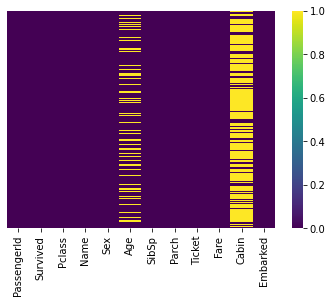

In [7]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=True, cmap='viridis')

<AxesSubplot:>

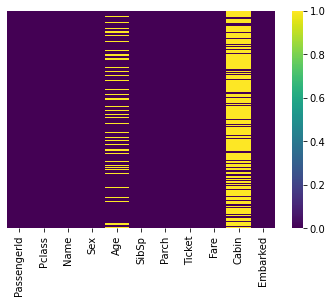

In [8]:
sns.heatmap(test.isnull(), yticklabels=False, cbar=True, cmap='viridis')

<h3>A we cn see maximum of data is missing from oly 2 column (Age, Cabin)</h3><br>
<h4>Data missing in Age is roufghly 30-40% of data so we can use some "ML algo" to pridict missing ages</h4>


<AxesSubplot:xlabel='Survived', ylabel='count'>

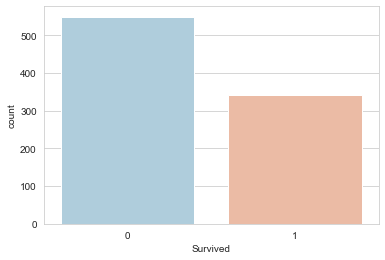

In [9]:
sns.set_style("whitegrid")
sns.countplot(x='Survived', data= train, palette = 'RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

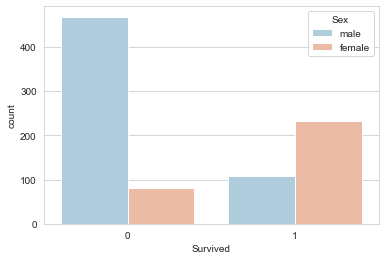

In [10]:
sns.set_style("whitegrid")
sns.countplot(x='Survived', hue='Sex' , data= train, palette = 'RdBu_r')

As we can see majority of people who servived are "Female"

<AxesSubplot:xlabel='Survived', ylabel='count'>

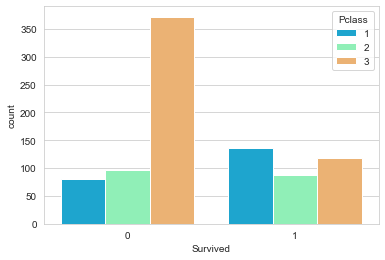

In [11]:
sns.set_style("whitegrid")
sns.countplot(x='Survived', hue='Pclass' , data= train, palette = 'rainbow')

<h4>Majority of "3rd Class Seat" Male Died in that incident</h4><br>
<h4>Were as Majority of 1st class Female servived</h4>

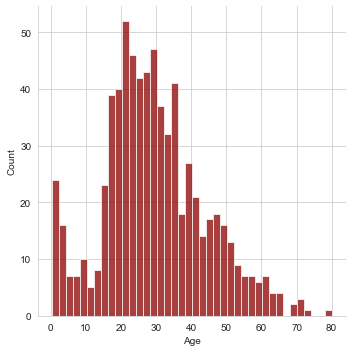

In [12]:
sns.displot(train.Age.dropna(), kde=False, color= 'darkred', bins=40) #kde = wave line

<AxesSubplot:>

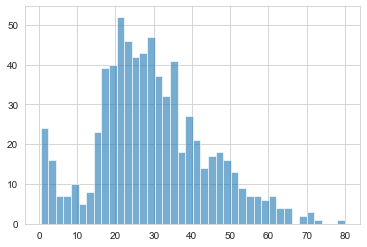

In [13]:
train['Age'].hist(bins = 40, alpha = 0.6) #alpha show darkness of colour where 0.1 is lowest and 0.9 is highest

Both sns.displor and pandas hist plot show same data we can se any one of it.<br>
I use both for my learning and future refrence

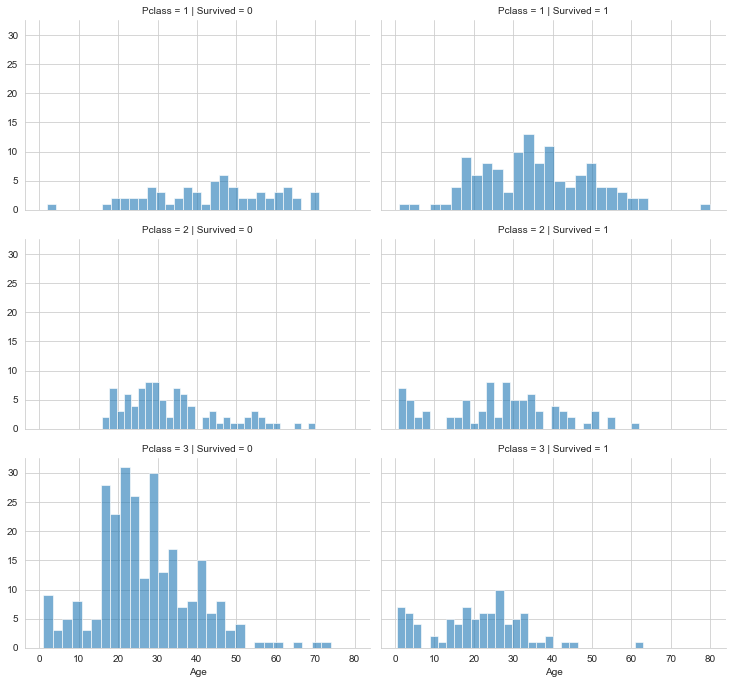

In [14]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train, col='Survived', row='Pclass', height=3.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.6, bins=30)
grid.add_legend();

We got conformation about majority of 3rd class passenger did not survived 

# DataCleaning

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

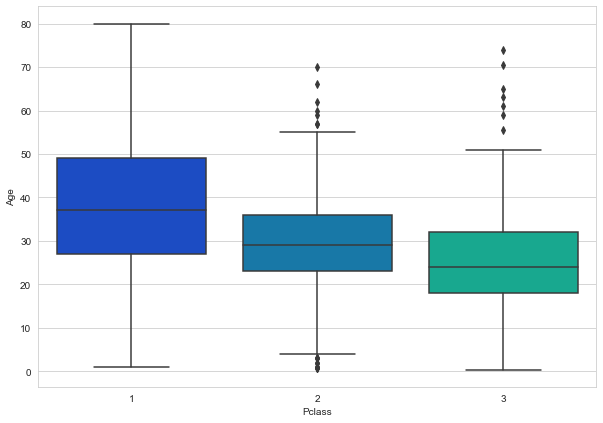

In [15]:
#Train Data
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')

In Train Dataset :<br>1st Class Passenger median age is around 37 <br>2nd Class is 29 and 3rd Class is 24

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

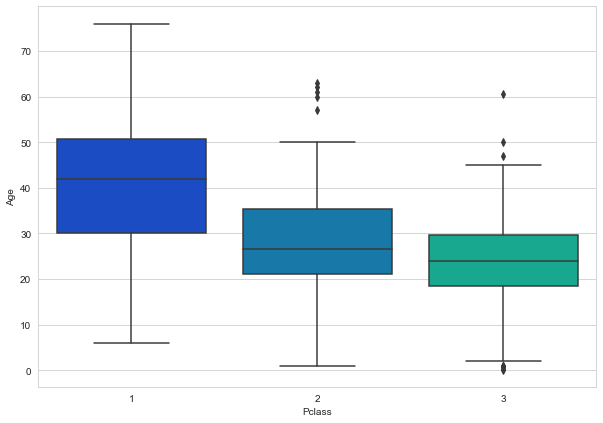

In [16]:
#Test data
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=test, palette='winter')

Aerage Age of :<br>
<li>1st class is 42</li>
<li>2nd class is 26</li>
<li>3rd class is 24</li>

In [17]:
#defining a function for required operation

def age_insert(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if pclass ==1:
            return 40
        if pclass ==2:
            return 27
        if pclass ==3:
            return 24
    else:
        return age

In [18]:
train['Age'] = train[['Age', 'Pclass']].apply(age_insert, axis = 1)
test['Age'] = test[['Age', 'Pclass']].apply(age_insert, axis = 1)

<AxesSubplot:>

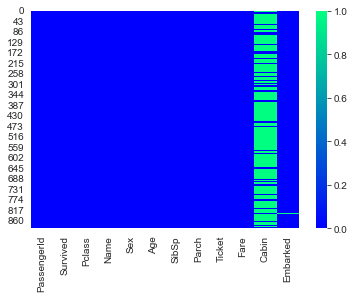

In [19]:
#Train data
sns.heatmap(train.isnull(), cmap='winter') 

<AxesSubplot:>

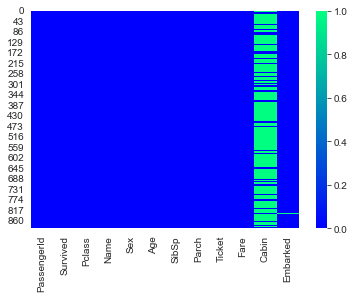

In [20]:
#Test Data
sns.heatmap(train.isnull(), cmap='winter')

As we can see now in the age coloumn, we replace null value by its median age according to its class

In [21]:
train.drop(["Cabin","Ticket","PassengerId","Name"], axis = 1, inplace = True)
pessander_id = test['PassengerId']
test.drop(["Cabin","Ticket","PassengerId","Name"], axis = 1, inplace = True)


After Removing unwanted column


<AxesSubplot:>

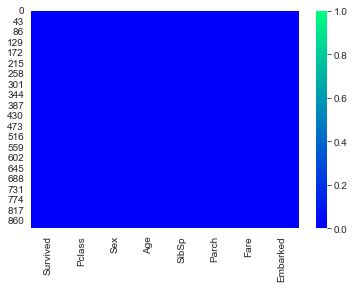

In [22]:
sns.heatmap(train.isnull(), cmap='winter')

In [23]:
train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [24]:
test.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


Now its time to convert "sex" and "embark" in numerical value,

In [25]:
#using One hot encoder and label encoder from sklearn library
label_encoder = LabelEncoder()

In [26]:
#Fitting Label encoder  and then transforming data
train["Embarked"] = label_encoder.fit_transform(train["Embarked"])
test["Embarked"] = label_encoder.fit_transform(test["Embarked"])

#Generatinf dummy Variable
hot_train_data = pd.get_dummies(train.Sex)
hot_test_data = pd.get_dummies(test.Sex)

#concatinating one_hot_encoder data columns into train and test data
train = pd.concat([train, hot_train_data], axis = 1)
test = pd.concat([test, hot_test_data], axis = 1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female,male
0,0,3,male,22.0,1,0,7.2500,2,0,1
1,1,1,female,38.0,1,0,71.2833,0,1,0
2,1,3,female,26.0,0,0,7.9250,2,1,0
3,1,1,female,35.0,1,0,53.1000,2,1,0
4,0,3,male,35.0,0,0,8.0500,2,0,1


In [27]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female,male
0,3,male,34.5,0,0,7.8292,1,0,1
1,3,female,47.0,1,0,7.0000,2,1,0
2,2,male,62.0,0,0,9.6875,1,0,1
3,3,male,27.0,0,0,8.6625,2,0,1
4,3,female,22.0,1,1,12.2875,2,1,0


In [28]:
train = train.drop(["Sex", "male"], axis = 1)#as we alredy created another row for male and female so we drop sex and male column
test = test.drop(["Sex", "male"], axis = 1)
test.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,female
0,3,34.5,0,0,7.8292,1,0
1,3,47.0,1,0,7.0000,2,1
2,2,62.0,0,0,9.6875,1,0
3,3,27.0,0,0,8.6625,2,0
4,3,22.0,1,1,12.2875,2,1


Ranging "Age" and "Fare" in (4/5) parameter

In [29]:
age_bin = [0,22.0,26.0,37.0,80.0]   #Bin should be one more then as lable
age_in = [0,1,2,3]

fare_bin = [0,7.91,14.454,31.0, 512.329]
fare_in = [0,1,2,3]

In [30]:
#converting Fare price in v
train['Fare_n'] = pd.cut(train['Fare'], bins = fare_bin, labels = fare_in) #qcut divide data into 4 equal set (by no. of passengers)
#train[['Fare', 'Survived']].groupby(['Fare'], as_index=False).mean().sort_values(by='Fare', ascending=True)
test['Fare_n'] = pd.cut(test['Fare'], bins = fare_bin, labels = fare_in)

In [31]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,female,Fare_n
0,0,3,22.0,1,0,7.2500,2,0,0
1,1,1,38.0,1,0,71.2833,0,1,3
2,1,3,26.0,0,0,7.9250,2,1,1
3,1,1,35.0,1,0,53.1000,2,1,3
4,0,3,35.0,0,0,8.0500,2,0,1


In [32]:
train["Age_n"] = pd.cut(train['Age'], bins = age_bin, labels = age_in)
test["Age_n"] = pd.cut(test['Age'], bins = age_bin, labels = age_in)
test.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,female,Fare_n,Age_n
0,3,34.5,0,0,7.8292,1,0,0,2
1,3,47.0,1,0,7.0000,2,1,0,3
2,2,62.0,0,0,9.6875,1,0,1,3
3,3,27.0,0,0,8.6625,2,0,1,2
4,3,22.0,1,1,12.2875,2,1,1,0


Deleting Unwanted Rows from Data and making it more simpler for our machine algo-

In [33]:
train = train.drop(['Age','Fare'], axis = 1)
test = test.drop(['Age','Fare'], axis = 1)

<h2>Final Data<h2>

<h4>Train Data</h4>

In [34]:
train.head()

,Survived,Pclass,SibSp,Parch,Embarked,female,Fare_n,Age_n
0,0,3,1,0,2,0,0,0
1,1,1,1,0,0,1,3,3
2,1,3,0,0,2,1,1,1
3,1,1,1,0,2,1,3,2
4,0,3,0,0,2,0,1,2


<h4>Test Data</h4>

In [35]:
test.tail()

,Pclass,SibSp,Parch,Embarked,female,Fare_n,Age_n
413,3,0,0,2,0,1,1
414,1,0,0,0,1,3,3
415,3,0,0,2,0,0,3
416,3,0,0,2,0,1,1
417,3,1,1,0,0,2,1


# Appling Different Models

<h2>We are going to use these ML algo for predication:-</h2>
<h4>
1. Logistic Regression<br><br>                 
2. KNN or k-Nearest Neighbors<br><br>
3. Support Vector Machines<br><br>
4. Naive Bayes classifier<br><br>
5. Decision Tree<br><br>
6. Random Forrest<br><br>
7. Perceptron<br><br>
8. Artificial neural network<br><br>
9. RVM or Relevance Vector Machine<br><br>
</h4>

In [36]:
from sklearn.preprocessing import StandardScaler
sc_t = StandardScaler()
sc_te =  StandardScaler()

In [37]:
#splitting data:
X_train = train.drop('Survived', axis = 1)
Y_train = train['Survived']
X_test = test.copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [38]:
X_train = sc_t.fit_transform(X_train)
X_test = sc_te.fit_transform(X_test)

<h4>Logistic Regression</h4>

In [39]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.92

This Score is based on train data

<h4>Support Vector Machines</h4>

In [40]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.28

SVM Accuracy is better then Logistic Regression

<h4>K Nearest Neighbor Classification</h4>

In [41]:
knn = KNeighborsClassifier(n_neighbors = 4) # n_neighbors = 2 (80%)/ = 3(82%)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.29

With "no. of neighbors" = 4 we got better Accuracy

<h4>Gaussian Naive Bayes</h4>

In [42]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

75.98

<h4>Perceptron</h4>

In [43]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

71.83

<h4>Liner SVC</h4>

In [44]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

C:\Python\Python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


80.36

<h4>Stochastic Gradient Descent</h4>

In [45]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

78.56

<h4>Decision Tree</h4>

In [46]:
decision_tree = DecisionTreeClassifier(min_samples_split = 2)
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

87.09

Decision Tree Predication Accuracy is better then KNN classification

<h4>Random Forest</h4>

In [47]:
random_forest = RandomForestClassifier(n_estimators=500)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

87.09

Same as Decision Tree

<h3>Model evaluation</h3><br>
We can now rank our evaluation of all the models to choose the best one for our problem.

In [48]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,87.09
8,Decision Tree,87.09
1,KNN,84.29
0,Support Vector Machines,83.28
2,Logistic Regression,80.92
7,Linear SVC,80.36
6,Stochastic Gradient Decent,78.56
4,Naive Bayes,75.98
5,Perceptron,71.83


<h4>Creating New DataFrame of final Output</h4>

In [49]:
submission = pd.DataFrame({
        "PassengerId": pessander_id,
        "Survived": Y_pred
    })
submission.to_csv('submission.csv', index=False)